## Linear Regression

$y = θ_{0}x_{0} + θ_{1}x_{1} + θ_{2}x_{2} + ... + θ_{n}x_{n}$

where: <br>
* $y$ - is the predicted value 
* $n$ - is number of features 
* $x_{i}$ - is the $i^{th}$ feature value
* $θ_{j}$ - is $j^{th}$ model parameter 

---

### Linear Regression model

$y = h_{θ}(x) = θ^{T} \cdot x$

where: <br>
* $θ$ - is parameter vector
* $θ^{T}$ - is transpose of $θ$
* $x$ - is feature vector
* $θ^{T} \cdot x$ - is the dot product of $θ^{T}$ and $x$
* $h_{θ}$ - is the hypothesis function

---

### Mean Square Error

$MSE(X, h_{θ}) = \frac{1}{m} \sum_{i=0}^{m}(θ^{T} \cdot x^{(i)} - y^{(i)})$

---

### The Normal Equation

$θ = (X^T \cdot X)^{-1} \cdot X^T \cdot y$



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

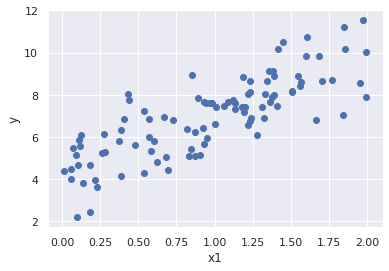

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.33018714],
       [2.75368706]])

In [4]:
X_new = range(3)
y_pred = [theta_best[0] + theta_best[1] * x for x in X_new]
y_pred

[array([4.33018714]), array([7.0838742]), array([9.83756126])]

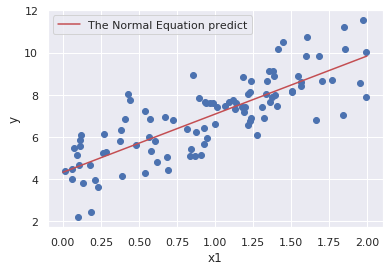

In [5]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, label='The Normal Equation predict', c='r')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

y_pred_lr = lin_reg.predict(np.array(X_new).reshape(-1, 1))
y_pred_lr

[4.33018714] [[2.75368706]]


array([[4.33018714],
       [7.0838742 ],
       [9.83756126]])

### Batch Gradient Descent

$\Delta_{\theta} MSE(\theta)=
 \begin{pmatrix}
  \frac{\delta}{\delta \theta_{0}} MSE(\theta)\\
  \frac{\delta}{\delta \theta_{1}} MSE(\theta) \\
  \vdots  \\ 
  \frac{\delta}{\delta \theta_{n}} MSE(\theta)
 \end{pmatrix} = \frac{2}{m} X^{T} \cdot (X \cdot \theta - y)
 $

<br>
Gradient Descent Step:

$\theta^{(next-step)}=\theta - \eta\Delta_{\theta}MSE(\theta)$

 


In [7]:
eta = 0.1  # learning rate
n_iterations = 1000
m = X_b.shape[0]

theta = np.random.randn(2, 1) # random init

for _ in range(n_iterations):
    delta = 2 * X_b.T.dot(X_b.dot(theta) - y) / m
    theta = theta - eta * delta

theta

array([[4.33018714],
       [2.75368706]])

### Stochastic Gradient Descent 

$\theta^{(next-step)} = \theta - \eta \Delta_{\theta}MSE(\theta_i)$

In [8]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.39315882],
       [2.83839127]])

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.31432636]), array([2.78991402]))

### Mini-batch Gradient Descent

In [37]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
mini_batch_size = 10

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization


for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + mini_batch_size]
        yi = y[random_index:random_index + mini_batch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.30590853],
       [2.7295764 ]])